<a href="https://colab.research.google.com/github/avinashmane/colab/blob/master/strava_likers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
## How to use
Manually after updating gsheet to control
Uses data from https://docs.google.com/spreadsheets/d/14a8u53o0V6jKwP1nxk0334jvKsRnW6J5hKzcaQAwUbw/edit#gid=618269022
## Setup Code/Parameters
* Setup
    * needs
        * auth
        * gsheet auth
        * cfg_strava
* updates sheets
* Todo
    * low: error: location not found 

## Config

In [1]:
repo='https://github.com/avinashmane/colab.git'
import os,sys
if os.name=='nt':
    LIB= r'c:\m\lib'
    LOG= r'c:\m\social-media-automation'
    AUTH= r'c:\i\auth'
    sys.path.append("./lib")
else:
    if not os.path.exists('drive'):
        from google.colab import drive
        drive.mount('/content/drive')
    LIB='/content/drive/MyDrive/m/lib'
    LOG='/content/drive/MyDrive/m/lib'
    AUTH='/content/drive/MyDrive/m/auth'
    if not os.path.exists('m'):
      !ln -sd '/content/drive/MyDrive/m/' m
    if not os.path.exists('repo'):
      !git clone $repo repo
    sys.path.append('repo')
    sys.path.append("repo/lib")
sys.path.append(LIB)

In [53]:
import yaml
cfg=yaml.load(u"""
repo:
    https://github.com/avinashmane/colab.git
packages: 
    chromium-chromedriver
modules:
    nerodia
    pygsheets
env:
    nt:
        LIB: c:/m/lib
        LOG: c:/m/social-media-automation
        AUTH: c:/i/auth
    posix:
        LIB: /content/drive/MyDrive/m/lib
        LOG: /content/drive/MyDrive/m/lib
        AUTH: /content/drive/MyDrive/m/auth
sheets:
    stravasync:
        url: https://docs.google.com/spreadsheets/d/1Q8SA641P0aytWzPGmeHG_xuxll3Wq6phsxjb91RjgWY/edit#gid=0
        tab: Members
        range: A10:O
    StravaPromoLog:
        url: https://docs.google.com/spreadsheets/d/14a8u53o0V6jKwP1nxk0334jvKsRnW6J5hKzcaQAwUbw/edit#gid=179675201
        tab: StravaPromoLog
    StravaCommentLog:
        url: https://docs.google.com/spreadsheets/d/14a8u53o0V6jKwP1nxk0334jvKsRnW6J5hKzcaQAwUbw/edit#gid=179675201
        tab: StravaCommentLog
    Certificates:
        url: https://docs.google.com/spreadsheets/d/1uuw1oavkE7Ahr1h-mmkSaNhR-MUcVRER5KVSyLM7Ot0/edit#gid=1084861083
        tab: 
        
""",Loader=yaml.Loader)
for x in cfg['env'][os.name]: 
    os.environ[x]=eval(x)

import importlib
import utils
importlib.reload(utils)
utils.setup_env(cfg['packages'],cfg['modules'])

'Environment setup'

## Code

In [3]:
import pandas as pd
import gsheets
import importlib
from datetime import datetime
from nerodia.browser import Browser
import nerodia
import re
import logging
from IPython.display import Image

import utils

import socialmediasite 
importlib.reload(socialmediasite)
Strava=socialmediasite.Strava
SocialMediaSite=socialmediasite.SocialMediaSite

In [5]:
df_mc=gsheets.Gsheet(cfg['sheets']['StravaPromoLog']['url']).getSheetDf('StravaPromoLog','A1')
df_mc.loc[(df_mc.status=='nonMember') ].drop_duplicates('athlete').location.value_counts().head(20)

                               28
 · Haveli, India               27
 · Pune City, Maharashtra      22
 · Pune City, India            20
 · Haveli, Maharashtra         18
 · Mulshi, India                8
 · Mulshi, Maharashtra          5
 · Mumbai, Maharashtra          5
 · Bengaluru, India             4
 · Mumbai, India                4
 · London, United Kingdom       3
 · São Paulo, Brazil            3
 · Navi Mumbai, Maharashtra     3
 · India                        2
 · Anekal, India                2
 · Culiacán Rosales, Mexico     2
 · Sammamish, Washington        2
 · Kalyan - Dombivli, India     2
 · Kolhapur, India              2
 · Sabah, Malaysia              2
Name: location, dtype: int64

In [49]:
_df=df_mc.loc[(df_mc.status=='nonMember') 
          & df_mc.location.isin([#' · Pune City, Maharashtra',' · Pune City, India',
                                 # ' · Haveli, Maharashtra', ' · Haveli, India',
                                 ' · Mulshi, Maharashtra',' · Mulshi, India'
                                ])].drop_duplicates('athlete',keep='last') #Haveli
_df.to_clipboard()
_df

,SrNo,Timestamp,fn,status,athlete,name,activity,location
62,2022-08-08 08:18:41,INFO,giveKudos,nonMember,https://www.strava.com/athletes/64583651,Biswa Nayak,https://www.strava.com/activities/7601010633,"· Mulshi, Maharashtra"
98,2022-08-08 08:54:02,INFO,giveKudos,nonMember,https://www.strava.com/athletes/3865939,PT India,https://www.strava.com/activities/7598176908,"· Mulshi, Maharashtra"
117,2022-08-08 08:55:03,INFO,giveKudos,nonMember,https://www.strava.com/athletes/21598744,Rohini Pote,https://www.strava.com/activities/7601065798,"· Mulshi, Maharashtra"
528,2022-08-12 05:17:08,INFO,giveKudos,nonMember,https://www.strava.com/athletes/26622310,IRONMAN RAHUL NALAWADE ECO 🚴🏊🏃,https://www.strava.com/activities/7623687940,"· Mulshi, India"
532,2022-08-12 05:17:16,INFO,giveKudos,nonMember,https://www.strava.com/athletes/25432007,Sadanand Datir,https://www.strava.com/activities/7623661206,"· Mulshi, India"
1266,2022-08-18 05:01:00,INFO,giveKudos,nonMember,https://www.strava.com/athletes/49540275,Maneesh Bhawalkar,https://www.strava.com/activities/7656861542,"· Mulshi, India"
1274,2022-08-18 05:01:16,INFO,giveKudos,nonMember,https://www.strava.com/athletes/63948277,SR Pandurang Bodke,https://www.strava.com/activities/7656854366,"· Mulshi, India"
1300,2022-08-18 14:44:32,INFO,giveKudos,nonMember,https://www.strava.com/athletes/9045162,Ankur Jain,https://www.strava.com/activities/7657400251,"· Mulshi, Maharashtra"
1389,2022-08-18 13:13:06,INFO,giveKudos,nonMember,https://www.strava.com/athletes/19396097,Shaleen Sinha,https://www.strava.com/activities/7658642285,"· Mulshi, India"
1395,2022-08-18 13:13:19,INFO,giveKudos,nonMember,https://www.strava.com/athletes/70060789,Rakesh Baidya,https://www.strava.com/activities/7658461721,"· Mulshi, India"


# Process
## Create headless

In [7]:
" Test Selenium headless"
if True:
    if os.name=='nt':
        b=Browser('chrome',)
    else:
        
        # import sys
        # sys.path.insert(0,f'{DIR}/geckodriver')
        from selenium import webdriver

        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--headless')
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        # b =webdriver.Chrome('chromedriver',options=chrome_options)
        b=Browser('chrome',options=chrome_options,)
    # b.get("https://www.google.com")
    utils.setLogger(f"{LOG}/strava-automation.log")
    # ss = Gsheet('stravasync').getSheetByTitle('StravaPromoLog')

2022-08-19 14:42:44:INFO:Logger file: c:\m\social-media-automation/strava-automation.log


In [8]:
# %debug
# if os.name=='nt':
strava=Strava(b,authFile=f'{AUTH}/auth.yaml',cfgFile=f"{LIB}/cfg_strava.yaml")
# else:
#   strava=Strava(b,authFile=r'/content/drive/MyDrive/m/auth/auth.yaml',cfgFile="/content/drive/MyDrive/m/social-media/cfg_strava.yaml")
# test case
# strava.login("avinash")

In [9]:
strava.login("mileage_league_strava")

In [10]:
nerodia.default_timeout=3
# strava.logout()

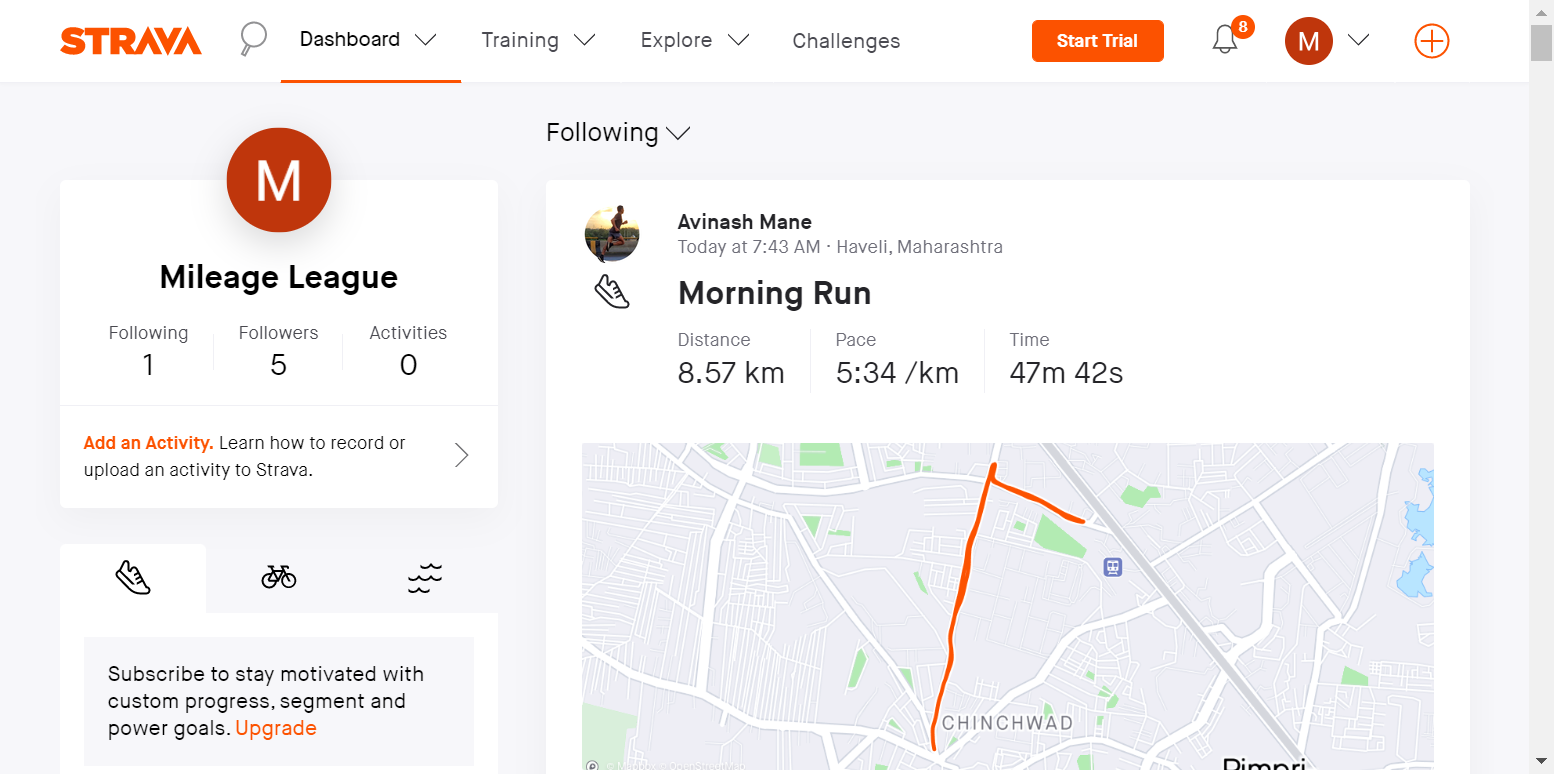

In [11]:
Image(b.screenshot.png())

## A. post comments

Uses data from https://docs.google.com/spreadsheets/d/14a8u53o0V6jKwP1nxk0334jvKsRnW6J5hKzcaQAwUbw/edit#gid=618269022

In [90]:
comment_text="""
Well done. Keep moving and stay fit!

Join mileage challenge for free at https://indiathon.web.app
"""

In [91]:
# %time
comment_ss=gsheets.Gsheet(cfg['sheets']['StravaCommentLog']['url'])
comment_tab=comment_ss.getSheetByTitle(cfg['sheets']['StravaCommentLog']['tab'])

df_comments=comment_ss.getSheetDf('StravaCommentLog','A1')
#get columns positions
cols={x:df_comments.columns.get_loc(x)+1 for x in ['comment_ts','comment_text']}
for i,d in df_comments.iterrows():
    if not d['comment_ts']: 
        #if already not posted
        strava.goto(f'{d["activity"]}#comments')
        textButton=strava.browser.textarea()
        textButton.value=comment_text
        postButton=strava.browser.button(data_testid='post-comment-btn').wait_until(timeout=.1,method=lambda x:x.exists)
        postButton.execute_script("arguments[0].click();", postButton)
        comment_tab.update_values(crange=(i+2,cols['comment_ts']),
                             values=[[pd.Timestamp.now().isoformat(),comment_text]])


In [81]:
len(strava.browser.textareas())

1

## Give likes on Club

In [12]:
b.goto('https://www.strava.com/clubs/196654/recent_activity')
# strava.login("strava_pcmcrunners")
logging.info(f"Total number of cards on {strava.browser.title}: {len(b.divs(class_name=re.compile('^Card')))}")


2022-08-19 14:43:47:INFO:Logged in with pcmcrunners@gmail.com
2022-08-19 14:43:47:INFO:Total number of cards on Dashboard | Strava: 19


# Test

In [16]:
## Comment on PCMC club
strava.goto("https://www.strava.com/clubs/196654/recent_activity")

'https://www.strava.com/clubs/196654/recent_activity'

In [46]:
card.text
[x.link().text for x in [card.div(class_name=re.compile("^MediaBody--media-body--"))]]
[None,None]

[None, None]

In [47]:
def postComment(commentButtonEl,text):
  commentButtonEl.execute_script("arguments[0].click();", commentButtonEl)
  try:
      footer=commentButtonEl.parent(class_name='EntryFooter--entry-footer--Gy+uP')
      ta=footer.textarea().wait_until(timeout=.1,method=lambda x:x.exists)
      ta.value=text
      # postButton=footer.button(data_testid='post-comment-btn').wait_until(timeout=.1,method=lambda x:x.exists)
      # postButton.execute_script("arguments[0].click();", postButton)
  except: pass


KudosButtons=strava.browser.buttons(title=strava.giveKudosPattern)
for i,x in enumerate(KudosButtons):
  try:
    card=x.parent(tag_name='div',class_name=re.compile('^Card'))
    if not card.exists: break

    athUrl,ath=utils.getAttrsIfExists(card.link(data_testid="owners-name"),
                                               ['href','text',])
    actUrl,act=utils.getAttrsIfExists(card.link(data_testid="activity_name"),
                                           ['href','text',])
    print(ath,athUrl,act,actUrl,card.text.replace("\n"," ")[:30])
    
    for b in card.buttons(data_testid="comment_button"):
        postComment(b,"Well done!  Keep running")
    # x.click() 
    try:
        x = int(re.findall(".*\/([0-9]*)",athId)[0])
        if x not in StravaMembers:
            x='nonMember'
    except:
        x='not valid'

    # self.browser.execute_script("arguments[0].click();", x)
    # ss.append_table([[pd.Timestamp.now().isoformat(),"INFO","Comments",x,athId,name,actId,loc,]])    
    # logging.info(f"giveKudos: {i},{x} {athId} {actId} {ath}")
  except Exception as e: 
    logging.warning(f"giveKudos: {i} error clicking {e!r}")


Fabrizio Lancia https://www.strava.com/athletes/27331750 Corsa mattutina https://www.strava.com/activities/7663090247 Fabrizio Lancia Today at 9:54 
Mohamed Ismail https://www.strava.com/athletes/60436252 Morning Run https://www.strava.com/activities/7662879435 Mohamed Ismail Today at 9:05 A
MICKY GYANCHANDANI https://www.strava.com/athletes/39636347 Lunch Run https://www.strava.com/activities/7662880302 MICKY GYANCHANDANI Today at 11
🇪🇸oscar ortiz vidal🇪🇸 https://www.strava.com/athletes/5930130 Soltar. Que ganas de volver a entrenar por mi pueblo. https://www.strava.com/activities/7662676153 🇪🇸oscar ortiz vidal🇪🇸 Today at
vincent.a SR https://www.strava.com/athletes/46028558 Seashore walk nagore to Narimanam https://www.strava.com/activities/7662598060 vincent.a SR Today at 10:02 AM
🇪🇸oscar ortiz vidal🇪🇸 https://www.strava.com/athletes/5930130 3km calent. CC + cambios cortos en arena playa. https://www.strava.com/activities/7662676106 🇪🇸oscar ortiz vidal🇪🇸 Today at
Sangeeta Joshi http

In [ ]:
b.link(href="#container-nav").click()

In [ ]:
b.button(title="Expand profile menu").hover()

In [ ]:
[(x.text,x.class_name,x.tag_name) for x in b.button(title="Expand profile menu").span().span()]

In [ ]:
# b.execute_script("window.scrollTo(0,0)")
# Image(b.screenshot.png())
re.findall(".*\/([0-9]*)","https://www.strava.com/athletes/27331750")[0]

In [ ]:
"get all attributes"
# for x in dir(b):
#   print(x,type(getattr(b,x)),)

# New section


In [ ]:
import unittest

class TestNotebook(unittest.TestCase):
    
    def test_add(self):
        self.assertEqual(5, 5)
        

unittest.main(argv=[''], verbosity=2, exit=False)


In [ ]:
?unittest

In [ ]:
import mocha

In [ ]:
errorr not further

In [ ]:
import yaml
import time
from datetime import datetime
import os
from nerodia.browser import Browser
import nerodia
import re
import logging
from IPython.display import Image

def setLogger(logFile=None,level=logging.INFO):
    # level = logging.INFO if level is None else 
    from imp import reload
    # jupyter notebook already uses logging, thus we reload the module to make it work in notebooks
    # http://stackoverflow.com/questions/18786912/get-output-from-the-logging-module-in-ipython-notebook
    reload(logging)
    logging.basicConfig( level=level,
                    format='%(asctime)s:%(levelname)s:%(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S')
                    
    if logFile:
        logger = logging.getLogger()
        fhandler = logging.FileHandler(filename=logFile, mode='a',encoding='utf-8')
        formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s'
                                     ,datefmt='%Y-%m-%d %H:%M:%S')
        fhandler.setFormatter(formatter)
        logger.addHandler(fhandler)
        logger.setLevel(level)
        
    logging.info("Logger file: "+logFile if logFile else "None")


class SocialMediaSite:
    "Generic website"
    authType=None
    cfg={}

    giveKudosPattern=re.compile(r'.*ive kudos')    
    def __init__(self,b,browser='firefox',authFile=f'{AUTH}/auth.yaml'):
        # create brwoser unless provided
        self.browser=Browser(browser) if b==None else b
        nerodia.default_timeout=10
        with open(authFile) as file:
            # The FullLoader parameter handles the conversion from YAML
            # scalar values to Python the dictionary format
            auth = yaml.safe_load(file)
            self.auth={x:auth[x] for x in auth if x in ['strava','facebook']}
        
    def login():
      raise NotImplemented
      
    def loadCookie(self,cookieFile):
        if cookieFile and os.path.exists(cookieFile):
          self.browser.cookies.load(file=cookieFile)
          
    def saveCookie(self,cookieFile):
        return self.browser.cookies.save(file=cookieFile)
    def clearCookie(self,cookieFile):
        return self.browser.cookies.clear()
    def close(self):
        return self.browser.close()
    @staticmethod
    def getParent(el,tag,patClass):
      """
      Get parents with tag and patterm of class matching
      Parameters
      ----------
      - el : reference node
      - tag : tag_type (e.g. div)
      - patClass : class of patterns (re.compile)
      Returns
      -------
      - Single element than meets the requirements
      """
      return el._xpath_adjacent( tag_name='div',class_name=re.compile(patClass), adjacent='ancestor', plural=False)
    
    @staticmethod
    def getLinkByClassPatt(tag,classPattern): 
        x= tag.link(class_name=re.compile(classPattern))
        return x.href,x.text
    
    @staticmethod
    def _dumptag(el,tags=None,level=0):
      for c in el.children(tag_name=tags):
          print(' '*level,c.tag_name,c.id,c.text[:50])
          SocialMediaSite._dumptag(c,level+1)
    
        

In [ ]:
# from __future__ import print_statement
# !pip install swagger_client
import time
import swagger_client
from swagger_client.rest import ApiException
from pprint import pprint

# Configure OAuth2 access token for authorization: strava_oauth
swagger_client.configuration.access_token = 'YOUR_ACCESS_TOKEN'

# create an instance of the API class
api_instance = swagger_client.AthletesApi()
id = 789 # Long | The identifier of the athlete. Must match the authenticated athlete.

try: 
    # Get Athlete Stats
    api_response = api_instance.getStats(id)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling AthletesApi->getStats: %s\n" % e)